In [12]:
from astropy.io import fits
from astropy.table import Table
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
dataf = fits.open('data/sw_input.fits')
data = Table(dataf[1].data).to_pandas()
dataf.close()

In [3]:
reducer = umap.UMAP()

In [14]:
cols = ['flux_u', 'flux_g', 'flux_r', 'flux_i', 'flux_z', 'flux_w1', 'flux_w2', 
         'flux_w3', 'flux_w4' ]

sample = data[cols].sample(n=2000)
umap_data = StandardScaler().fit_transform(sample.values)

In [15]:
embedding = reducer.fit_transform(sample)
embedding.shape

(2000, 2)

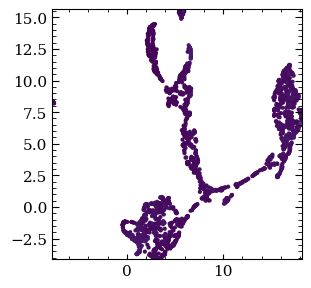

In [17]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = sample['flux_g']/sample['flux_i']
)
